In [1]:
#Show each metric I am using. Talent based approach. 
#Illustrate how talent's presence in top 250 movies correlates with imdbRating
#Show examples of predictions. 
#
#
#
#
#
#
#

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
from lxml import html


%matplotlib inline

In [3]:
pd.read_csv('Project6DF.csv')

,Director,Released,Title,Writer,Year,imdbID,imdbRating,Actor1,Actor2,Actor3,Actor4,dircount,writcount,a1count,a2count,a3count,a4count,starpower
0,Frank Darabont,14 Oct 1994,The Shawshank Redemption,"Stephen King (short story ""Rita Hayworth and S...",1994,tt0111161,9.3,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2,1,1,1,1,1,7
1,Frank Darabont,10 Dec 1999,The Green Mile,"Stephen King (novel), Frank Darabont (screenplay)",1999,tt0120689,8.5,Tom Hanks,David Morse,Michael Clarke Duncan,Bonnie Hunt,2,1,5,1,1,1,11
2,Steven Spielberg,24 Jul 1998,Saving Private Ryan,Robert Rodat,1998,tt0120815,8.6,Tom Hanks,Tom Sizemore,Edward Burns,Barry Pepper,7,1,5,1,1,1,16
3,Robert Zemeckis,06 Jul 1994,Forrest Gump,"Winston Groom (novel), Eric Roth (screenplay)",1994,tt0109830,8.8,Tom Hanks,Rebecca Williams,Sally Field,Michael Conner Humphreys,2,1,5,1,1,1,11
4,John Lasseter,22 Nov 1995,Toy Story,"John Lasseter (original story by), Pete Docter...",1995,tt0114709,8.3,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,1,1,5,2,1,1,11
5,Lee Unkrich,18 Jun 2010,Toy Story 3,"John Lasseter (story by), Andrew Stanton (stor...",2010,tt0435761,8.3,Tom Hanks,Tim Allen,Joan Cusack,Ned Beatty,1,1,5,2,1,1,11
6,Francis Ford Coppola,24 Mar 1972,The Godfather,"Mario Puzo (screenplay), Francis Ford Coppola ...",1972,tt0068646,9.2,Marlon Brando,Al Pacino,James Caan,Richard S. Castellano,3,1,3,1,1,1,10
7,Francis Ford Coppola,15 Aug 1979,Apocalypse Now,"John Milius, Francis Ford Coppola, Michael Her...",1979,tt0078788,8.5,Marlon Brando,Martin Sheen,Robert Duvall,Frederic Forrest,3,1,3,1,1,1,10
8,Elia Kazan,22 Jun 1954,On the Waterfront,"Budd Schulberg (screenplay), Budd Schulberg (b...",1954,tt0047296,8.2,Marlon Brando,Karl Malden,Lee J. Cobb,Rod Steiger,1,1,3,1,2,1,9
9,Sidney Lumet,01 Apr 1957,12 Angry Men,"Reginald Rose (story), Reginald Rose (screenplay)",1957,tt0050083,8.9,Martin Balsam,John Fiedler,Lee J. Cobb,E.G. Marshall,3,1,1,1,2,1,9


In [4]:
top_films4 = pd.read_csv('Project6DF.csv')

In [5]:
top_films4[['starpower','imdbRating']].corr()

,starpower,imdbRating
starpower,1.000000,0.247477
imdbRating,0.247477,1.000000


In [6]:
top_films4[['dircount','imdbRating']].corr()

,dircount,imdbRating
dircount,1.000000,0.219683
imdbRating,0.219683,1.000000


In [7]:
top_films4[['writcount','imdbRating']].corr()

,writcount,imdbRating
writcount,1.000000,0.108374
imdbRating,0.108374,1.000000


In [8]:
top_films4[['a1count','imdbRating']].corr()

,a1count,imdbRating
a1count,1.000000,0.111827
imdbRating,0.111827,1.000000


In [9]:
top_films4[['a2count','imdbRating']].corr()

,a2count,imdbRating
a2count,1.000000,0.092397
imdbRating,0.092397,1.000000


In [10]:
top_films4[['a3count','imdbRating']].corr()

,a3count,imdbRating
a3count,1.000000,0.134082
imdbRating,0.134082,1.000000


In [11]:
top_films4[['a4count','imdbRating']].corr()

,a4count,imdbRating
a4count,1.000000,0.032937
imdbRating,0.032937,1.000000


In [34]:
top_films4[['Year', 'imdbRating']].corr()

,Year,imdbRating
Year,1.000000,-0.046964
imdbRating,-0.046964,1.000000


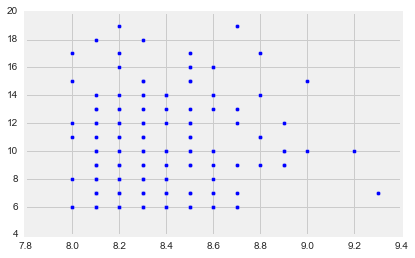

In [12]:
plt.scatter(top_films4['imdbRating'].values, top_films4['starpower'].values)

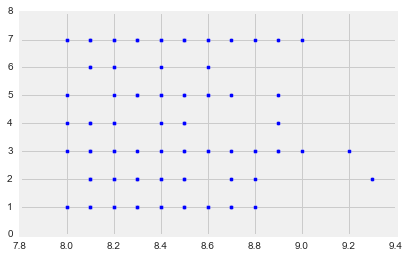

In [13]:
plt.scatter(top_films4['imdbRating'].values, top_films4['dircount'].values)

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
%matplotlib inline

In [15]:
from sklearn.preprocessing import MinMaxScaler

x = top_films4.loc[:, 'dircount':].copy()
#x['starpower'] = MinMaxScaler().fit_transform(x['starpower'].astype(float).reshape(-1, 1))
#x['dircount'] = MinMaxScaler().fit_transform(x['dircount'].astype(float).reshape(-1, 1))
#x['writcount'] = MinMaxScaler().fit_transform(x['writcount'].astype(float).reshape(-1, 1))
#x['a1count'] = MinMaxScaler().fit_transform(x['a1count'].astype(float).reshape(-1, 1))
#x['a2count'] = MinMaxScaler().fit_transform(x['a2count'].astype(float).reshape(-1, 1))
#x['a3count'] = MinMaxScaler().fit_transform(x['a3count'].astype(float).reshape(-1, 1))
#x['a4count'] = MinMaxScaler().fit_transform(x['a4count'].astype(float).reshape(-1, 1))
### standardize all other features
y = top_films4['imdbRating']

In [16]:
print(x)

     dircount  writcount  a1count  a2count  a3count  a4count  starpower
0           2          1        1        1        1        1          7
1           2          1        5        1        1        1         11
2           7          1        5        1        1        1         16
3           2          1        5        1        1        1         11
4           1          1        5        2        1        1         11
5           1          1        5        2        1        1         11
6           3          1        3        1        1        1         10
7           3          1        3        1        1        1         10
8           1          1        3        1        2        1          9
9           3          1        1        1        2        1          9
10          3          1        3        1        1        1         10
11          1          1        3        1        1        1          8
12          1          1        3        1        1        1    

In [17]:
from sklearn.ensemble import RandomForestRegressor 

#lr = LinearRegression()

lr = RandomForestRegressor()

lr.fit(x,y)
ypred = lr.predict(x)
lr.predict(x)

array([ 8.35255468,  8.6745    ,  8.55666667,  8.6745    ,  8.332     ,
        8.332     ,  8.86409524,  8.86409524,  8.225     ,  8.53158333,
        8.86409524,  8.26988095,  8.26988095,  8.73666667,  8.64      ,
        8.29940476,  8.3425    ,  8.46964286,  8.46964286,  8.46964286,
        8.46964286,  8.25333333,  8.185     ,  8.255     ,  8.29940476,
        8.49916667,  8.36133333,  8.17666667,  8.37522932,  8.49916667,
        8.2075    ,  8.44636508,  8.44636508,  8.33166667,  8.47      ,
        8.47      ,  8.36833333,  8.325     ,  8.155     ,  8.155     ,
        8.25166667,  8.25166667,  8.36842857,  8.794     ,  8.79333333,
        8.61833333,  8.4620873 ,  8.30166667,  8.29857143,  8.4620873 ,
        8.4620873 ,  8.15892424,  8.15892424,  8.37522932,  8.4       ,
        8.4       ,  8.19      ,  8.30533333,  8.52666667,  8.52666667,
        8.65333333,  8.37522932,  8.37522932,  8.35255468,  8.26642857,
        8.27916126,  8.61833333,  8.285     ,  8.15892424,  8.48

In [18]:
#x.iloc[5]

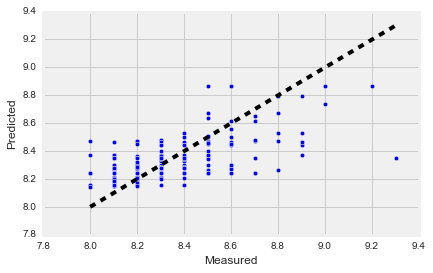

In [19]:
fig, ax = plt.subplots()
ax.scatter(y, ypred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

           importance
starpower    0.422940
dircount     0.248055
a1count      0.140850
a2count      0.056056
a3count      0.055000


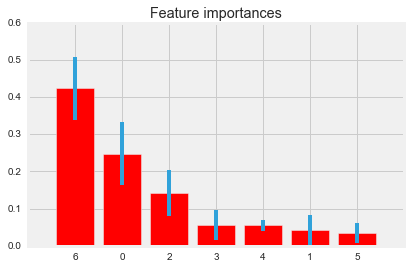

In [20]:
importances = lr.feature_importances_
std = np.std([tree.feature_importances_ for tree in lr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
feature_importances = pd.DataFrame(lr.feature_importances_, index = x.columns,\
                                   columns=['importance']).sort_values('importance',\
                                                                        ascending=False)
print(feature_importances.head())
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

In [21]:
xd = x.drop('starpower', axis=1)

lr = RandomForestRegressor()

lr.fit(xd,y)
ypred = lr.predict(xd)
lr.predict(xd)

array([ 8.30418088,  8.58      ,  8.48      ,  8.58      ,  8.31      ,
        8.31      ,  8.82152381,  8.82152381,  8.22083333,  8.89      ,
        8.82152381,  8.2434881 ,  8.2434881 ,  8.74      ,  8.65      ,
        8.31317647,  8.41      ,  8.37916667,  8.37916667,  8.37916667,
        8.37916667,  8.2875    ,  8.16083333,  8.35666667,  8.31317647,
        8.46133333,  8.30016667,  8.13916667,  8.3472845 ,  8.46133333,
        8.22130952,  8.41162374,  8.41162374,  8.38      ,  8.475     ,
        8.475     ,  8.25      ,  8.23      ,  8.143     ,  8.143     ,
        8.148     ,  8.148     ,  8.37619048,  8.88      ,  8.83      ,
        8.5725    ,  8.51666667,  8.3       ,  8.25586667,  8.51666667,
        8.51666667,  8.17652381,  8.17652381,  8.3472845 ,  8.42      ,
        8.42      ,  8.31285714,  8.30833333,  8.58666667,  8.58666667,
        8.63333333,  8.3472845 ,  8.3472845 ,  8.30418088,  8.36434524,
        8.28427778,  8.5725    ,  8.23888889,  8.17652381,  8.40

           importance
dircount     0.394904
a1count      0.214252
a3count      0.149705
writcount    0.087830
a4count      0.076790


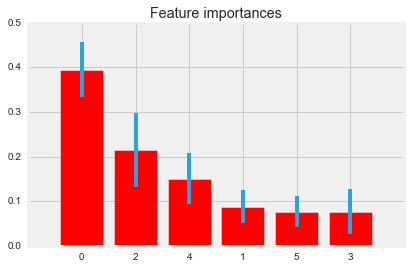

In [22]:
importances = lr.feature_importances_
std = np.std([tree.feature_importances_ for tree in lr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
feature_importances = pd.DataFrame(lr.feature_importances_, index = xd.columns,\
                                   columns=['importance']).sort_values('importance',\
                                                                        ascending=False)
print(feature_importances.head())
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(xd.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(xd.shape[1]), indices)
plt.xlim([-1, xd.shape[1]])
plt.show()

In [ ]:
toptier = 
lowtier =

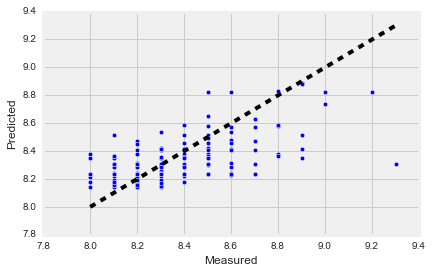

In [23]:
fig, ax = plt.subplots()
ax.scatter(y, ypred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import KFold, cross_val_score

cv = KFold(len(y), shuffle=True)

dt = DecisionTreeRegressor()

scores = cross_val_score(dt, x, y, cv=cv)
print(scores)

[-0.1794584  -0.20739326 -0.29928237]


In [64]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

scores = cross_val_score(rf, x, y, cv=cv)
print(scores)

[ 0.03463076 -0.03294615 -0.13295049]


In [65]:
from sklearn.model_selection import cross_val_predict

predict = cross_val_predict(rf, x, y, cv=cv)
print(predict)

[ 8.25502653  8.14833333  8.349       8.14833333  8.28        8.40166667
  8.54916667  8.96        8.3775      8.43592857  8.80266667  8.22083333
  8.33833333  8.41333333  8.70833333  8.23456746  8.42904762  8.27227778
  8.72333333  8.72333333  8.72333333  8.22477778  8.16916667  8.535       8.57
  8.4737265   8.27825     8.215       8.35562121  8.46690476  8.29266667
  8.39666667  8.39666667  8.212       8.22        8.68        8.44833333
  8.52916667  8.35333333  8.35333333  8.3475      8.3475      8.20333333
  8.78        8.32416667  8.57        8.30666667  8.1375      8.23957165
  8.30666667  8.60833333  8.27333333  8.27333333  8.30177778  8.315
  8.47571429  8.36904762  8.33        8.37        8.69        8.5225
  8.42441697  8.35562121  8.25502653  8.24266667  8.26894444  8.5725      8.37
  8.15390476  8.29        8.29        8.462       8.39666667  8.39666667
  8.30177778  8.2412835   8.22632574  8.34914752  8.34914752  8.31366667
  8.315       8.6         8.6         8.465     

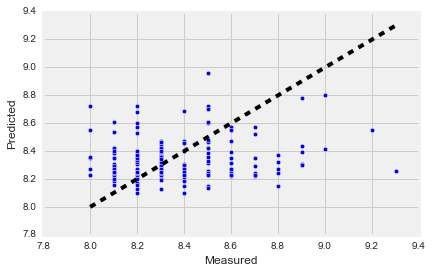

In [66]:
fig, ax = plt.subplots()
ax.scatter(y, predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [68]:
from sklearn.ensemble import AdaBoostRegressor


ab = AdaBoostRegressor()

scores = cross_val_score(ab, x, y, cv=cv)
scores

array([-0.05681858, -0.10434597,  0.04893716])

In [70]:
from sklearn.ensemble import GradientBoostingRegressor


gb = GradientBoostingRegressor()

scores = cross_val_score(gb, x, y, cv=cv)
scores

array([-0.06826375, -0.05980955, -0.15556631])

In [25]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

linreg = LinearRegression()
linreg = linreg.fit(x_train, y_train)
ypredicted = linreg.predict(x_test)

/Applications/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


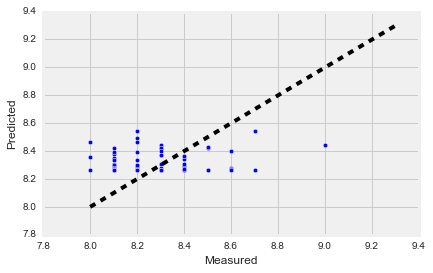

In [30]:
fig, ax = plt.subplots()
ax.scatter(y_test, ypredicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [73]:
top_films4[['dircount', 'writcount', 'a1count', 'a2count', 'a3count', 'a4count', 'starpower']]

,dircount,writcount,a1count,a2count,a3count,a4count,starpower
0,2,1,1,1,1,1,7
1,2,1,5,1,1,1,11
2,7,1,5,1,1,1,16
3,2,1,5,1,1,1,11
4,1,1,5,2,1,1,11
5,1,1,5,2,1,1,11
6,3,1,3,1,1,1,10
7,3,1,3,1,1,1,10
8,1,1,3,1,2,1,9
9,3,1,1,1,2,1,9
